# Warm-up Question (clicker)


Suppose we have a data frame called `my_pets` consisting of 6 rows and 4 columns:

<table>
    <tr> 
        <th>Name</th>
        <th>Species</th>
        <th>Weight_lb</th>
        <th>Age</th>
    </tr>
    <tr>
        <td>Alex</td>
        <td>Cat</td>
        <td>25</td>
        <td>8</td>
    </tr>
    <tr>
        <td>Bert</td>
        <td>Cat</td>
        <td>15</td>
        <td>3</td>
    </tr>
    <tr>
        <td>Cate</td>
        <td>Dog</td>
        <td>100</td>
        <td>4</td>
    </tr>
    <tr>
        <td>Doug</td>
        <td>Cat</td>
        <td>20</td>
        <td>3</td>
    </tr>
    <tr>
        <td>Evan</td>
        <td>Dog</td>
        <td>20</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Finn</td>
        <td>Rabbit</td>
        <td>4</td>
        <td>2</td>
    </tr>
</table>

We would like to create a summary data frame called `ave_weight_by_species`

<table>
    <tr> 
        <th>Species</th>
        <th>Average_Weight</th>
    </tr>
    <tr>
        <td>Cat</td>
        <td>20</td>
    </tr>
    <tr>
        <td>Dog</td>
        <td>60</td>
    </tr>
    <tr>
        <td>Rabbit</td>
        <td>4</td>
    </tr>
</table>

Which of the commands below would you use?

A

    my_pets_by_species <- group_by( my_pets, Average_Weight = mean(Weight_lb) )
    ave_weight_by_species <- summarize( my_pets_by_species )

B

    my_pets_by_species <- group_by( my_pets, Species )
    ave_weight_by_species <- summarize( my_pets_by_species, Average_Weight = mean(Weight_lb) )

C

    my_pets_by_species <- group_by( my_pets, Species )
    ave_weight_by_species <- summarize( my_pets, Average_Weight = mean(Weight_lb) )

In [1]:
my_pets <- data.frame( Name = c('Alex', 'Bert', 'Cate', 'Doug', 'Evan', 'Finn') ,
                       Species = c('Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Rabbit'),
                       Weight_lb = c(25, 15, 100, 20, 20, 4),
                       Age = c( 8, 3, 4, 3, 1, 2 ) 
                     )

my_pets

Name,Species,Weight_lb,Age
Alex,Cat,25,8
Bert,Cat,15,3
Cate,Dog,100,4
Doug,Cat,20,3
Evan,Dog,20,1
Finn,Rabbit,4,2


In [3]:
library('dplyr')

In [4]:
my_pets_by_species <- group_by( my_pets, Species )
ave_weight_by_species <- summarize( my_pets_by_species, Average_Weight = mean(Weight_lb) )

ave_weight_by_species

Species,Average_Weight
Cat,20
Dog,60
Rabbit,4


# Lesson 6: Visualizing Data

Today:
1. Bar plots, histograms, and scatterplots
2. Creating data visualizations with R
    + Bar plots
    + Histograms
    + Scatterplots

## 1. Bar plots, histograms, and scatterplots

### Bar Plots

+ One categorical variable
+ One bar for each group
+ Bar height = how many rows belong to that group

#### Example

In [5]:
my_pets

Name,Species,Weight_lb,Age
Alex,Cat,25,8
Bert,Cat,15,3
Cate,Dog,100,4
Doug,Cat,20,3
Evan,Dog,20,1
Finn,Rabbit,4,2


### Histograms

+ One numerical variable
+ Group the numbers (into "bins")
+ One bar for each bin
+ Bar height = how many rows belong to that bin

#### Example

### Scatterplots

+ Two numerical variables
+ One row = one point on the scatterplot

#### Example

In [ ]:
my_pets

## 2. Creating data visualizations with R

We will use an R package called `ggplot2` to create data visualizations.  To load the package, we run the cell below.  (We need to load the package just once each time we use a Jupyter Notebook.  We will use `ggplot2` often in future notebooks.)

In [4]:
library('ggplot2')

# ignore the commands below; these just make sure plots fit on the screen
library('repr')
options(repr.plot.width=3, repr.plot.height=3)

Next, let's load the dataset that we'll use today.

This data is taken from the [2015 NYC Street Tree Census data, from NYC Open Data](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35).  You can find this dataset saved as `NYC_Tree_census.csv` in the `datasets` folder in `shared`.  This dataset contains more than 600,000 rows of data, and is therefore quite large.  

We have included a smaller version of this dataset, `NYC_Tree_census_small.csv`, containing "only" 10,000 randomly chosen rows.  If you find that the large version takes a long time to work with, please use this smaller version.

In [2]:
nyc_trees <- read.csv( '../../shared/datasets/NYC_Tree_Census_small.csv' )

Before we start, let's try to get a basic understanding of what this dataset is.
+ How many observations?  How many variables?
+ What does each observation correspond to?
+ What types of variables are there in this dataset?

In [11]:
head(nyc_trees)

created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,⋯,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
10/29/2015,395911,401773,POINT (-74.07416139756627 40.62079281921162),5,0,OnCurb,Alive,Good,Cercis canadensis,⋯,61,23,SI08,Grymes Hill-Clifton-Fox Hills,5004000,New York,40.62079,-74.07416,963662.0,165456.7
11/10/2015,443025,501796,POINT (-73.89301179037105 40.824919471496926),12,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,⋯,85,32,BX27,Hunts Point,2012701,New York,40.82492,-73.89301,1013860.2,239835.7
06/06/2016,575926,325008,POINT (-73.75825058904266 40.675885076077165),2,0,OnCurb,Alive,Good,Maackia amurensis,⋯,29,10,QN66,Laurelton,4032800,New York,40.67589,-73.75825,1051306.6,185612.1
08/10/2015,134518,218253,POINT (-73.964263498351 40.71648243980813),4,0,OnCurb,Alive,Good,Zelkova serrata,⋯,50,26,BK73,North Side-South Side,3055500,New York,40.71648,-73.96426,994156.6,200312.4
09/29/2015,268823,332818,POINT (-73.73214905684478 40.689224042521786),7,0,OnCurb,Alive,Fair,Prunus virginiana,⋯,33,14,QN33,Cambria Heights,4062200,New York,40.68922,-73.73215,1058531.8,190492.9
07/29/2015,101414,218342,POINT (-73.95789245098955 40.71759182521193),6,0,OnCurb,Dead,,,⋯,50,18,BK73,North Side-South Side,3055300,New York,40.71759,-73.95789,995922.5,200717.4


### Using the `ggplot()` function to create data visualizations

The `ggplot2` package comes with various functions that let us make different types of visualizations.  In general, this is how the code for creating plots using `ggplot2` look like

```
ggplot( data = DATAFRAMENAME, aes( x = VARIABLENAME, ... ) ) + geom_TYPEOFPLOT()  
```
(depending on the type of plots, we might replace the `...` above with further information.)

Tooday, we will look at two types of plots: bar plots and histograms.

### 2.1. Bar Plots

We use bar plots when we work with a **categorical variable**, such as the `boroname` column in the `nyc_trees` dataset.  More specifically, we create bar plots to figure out how many observations belong to each group.



In our example, the `nyc_trees` dataset contains data of 10000 trees.  We might be interested in: whether the trees were evenly distributed across the five borough; which borough has the most/least number of trees; etc.



**To create a bar plot** using `ggplot2`, we use thefollowing command:
```
ggplot( data = DATAFRAMENAME, aes( x = VARIABLENAME ) ) + geom_bar() 
```
where `VARIABLENAME` should correspond to a categorical variable.

**Example**

We will create a bar plot to find out the distribution of trees across the five boroughs.

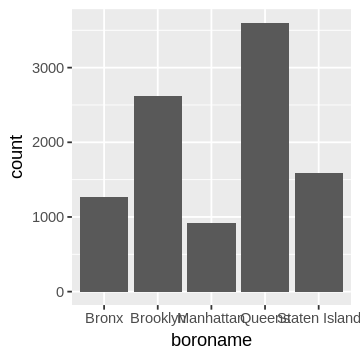

In [5]:
ggplot( nyc_trees , aes( x = boroname )) + geom_bar()

**Exercise**

Choose another categorical variable in the `nyc_trees` dataset and create a bar plot for this variable.

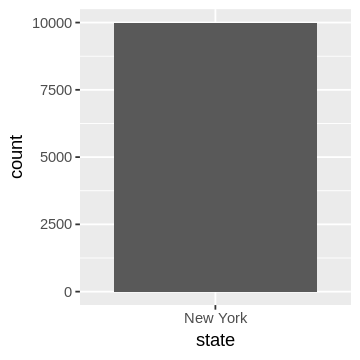

In [6]:
# create a bar plot for your chosen categorical variable

ggplot( nyc_trees, aes( x = state ) ) + geom_bar()


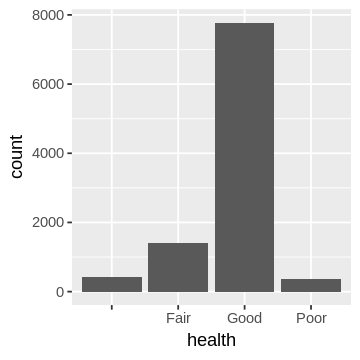

In [7]:
ggplot( nyc_trees, aes( x = health )  ) + geom_bar()

### 2.2. Histograms

We use histograms when we work with **numerical variables**, such as the `tree_dbh` column.  More specifically, we create histograms to get a sense of how the different tree diameter values are distributed: Are there equally-many thin, medium, and thick trees? Are there more thinner trees?



Histograms are similar to to bar plots in that they give us a sense of how "frequently" a value appear in the column.

However, When our columns contain numbers, we don't necessarily want one bar for each of those numbers.  Instead, we might want to group some numbers together.  For example, maybe we want to count the number of trees whose diameters are between 0 and 5 inches, between 5 and 10 inches, etc. and plot them.

To create a histogram using `ggplot2`, we use thefollowing command:
```
ggplot( DATAFRAMENAME, aes( x = VARIABLENAME ) ) + geom_histogram() 
```
where `VARIABLENAME` should correspond to a numerical variable.

**Example**

We will create a histogram to find out the distribution of tree diameters (in the column `tree_dbh`)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


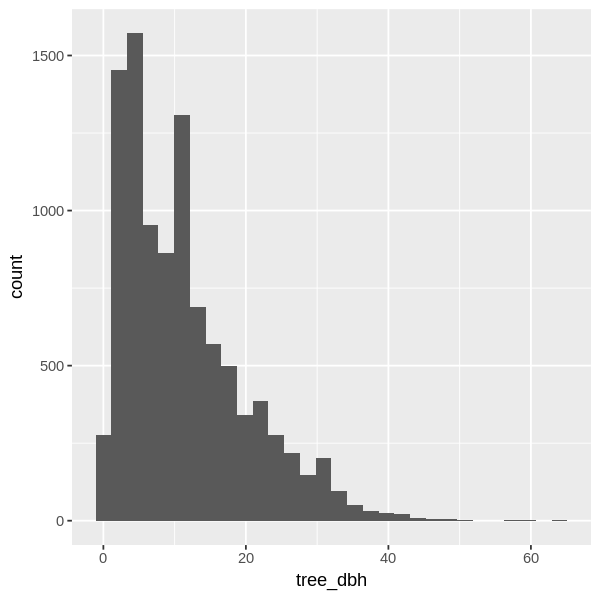

In [18]:
ggplot( nyc_trees,  aes( x = tree_dbh )  ) + geom_histogram( )

The plot above shows us that even though the data claims that there is a tree whose diameter is 450 inches, the vast majority of trees are under roughly 50 inches in diameter.

You might also notice a warning when the plot was produced: 

" `stat_bin()` using `bins = 30`. Pick better value with `binwidth`."

R automatically creates a histogram with 30 bars -- that is, it groups our tree diameters into 30 groups.  

If we want to change the number of "bins", we can add an extra input in our `ggplot2` command:

```
ggplot( DATAFRAMENAME, aes( x = VARIABLENAME ) ) + geom_histogram( bins = NUMBEROFBINS ) 
```

For example:

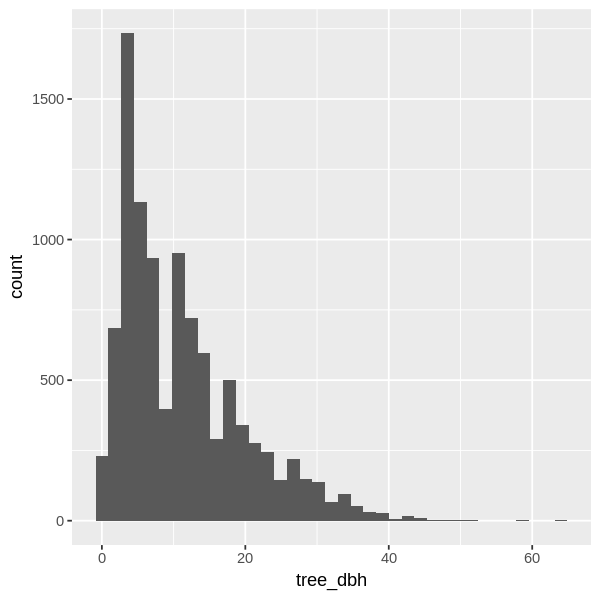

In [19]:
ggplot( nyc_trees,  aes( x = tree_dbh )  ) + geom_histogram( bins = 37  )

**Exercise**

Choose another numerical variable in the `nyc_tree` dataset and create a histogram for this variable.  Try changing the number of bins used.

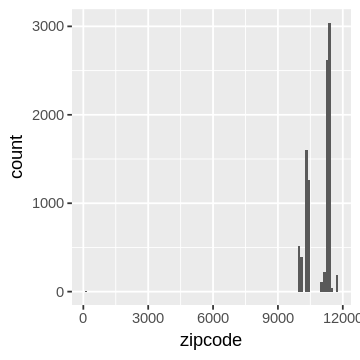

In [13]:
# Choose another numerical variable in the `nyc_tree_data` dataset and create a histogram for this variable.  
# Try changing the number of bins used.


ggplot( nyc_trees, aes( x = zipcode) ) + geom_histogram(bins = 100)



### 2.3. Scatterplots

We use scatterplots when we want to visualize the relationship between two numerical variables.

To create a scatter using `ggplot2`, we use thefollowing command:
```
ggplot( DATAFRAMENAME, aes( x = VARIABLENAME1, y = VARIABLENAME2 ) ) + geom_point() 
```
where `VARIABLENAME1` and `VARIABLENAME2` should correspond to numerical variables.

**Example**

We will create a scatterplot, plotting the x and y coordinates of the trees in this dataset

In [14]:
names(nyc_trees)

[1] "created_at" "tree_id"    "block_id"   "the_geom"   "tree_dbh"  
 [6] "stump_diam" "curb_loc"   "status"     "health"     "spc_latin" 
[11] "spc_common" "steward"    "guards"     "sidewalk"   "user_type" 
[16] "problems"   "root_stone" "root_grate" "root_other" "trnk_wire" 
[21] "trnk_light" "trnk_other" "brnch_ligh" "brnch_shoe" "brnch_othe"
[26] "address"    "zipcode"    "zip_city"   "cb_num"     "borocode"  
[31] "boroname"   "cncldist"   "st_assem"   "st_senate"  "nta"       
[36] "nta_name"   "boro_ct"    "state"      "Latitude"   "longitude" 
[41] "x_sp"       "y_sp"

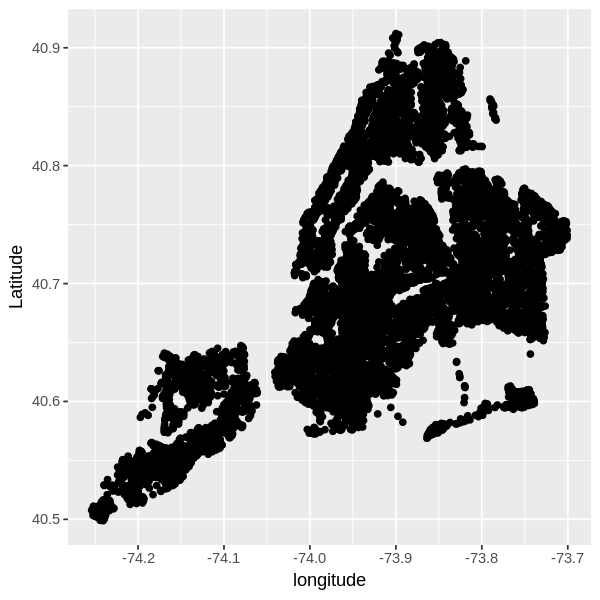

In [17]:
# ignore the commands below; these just make sure plots fit on the screen
library('repr')
options(repr.plot.width=5, repr.plot.height=5)

ggplot( nyc_trees, aes( x =  longitude, y = Latitude )) + geom_point()

**Exercises**

Let's try making visualizations from the other datasets we've seen previously.
+ Create one bar plot
+ Create one histogram
+ Create one scatterplot.

In [ ]:
my_pets